# **Challenge of the Week - ML Workflow**

© 2023, Zaka AI, Inc. All Rights Reserved.

---

## Case Study: Classifying Smokers vs Non Smokers

**Objective:**

In this challenge, you will work on a dataset that you saw during week 1 but this time with different aspect. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from it train_test_split and LogisticRegression Functions

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier

#### Read & visualize data
To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function. Print the head of your dataset.

In [143]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [144]:
rows = data.shape[0]
columns = data.shape[1]
print('There are {} rows and {} columns in our dataset.'.format(rows,columns))

There are 1338 rows and 7 columns in our dataset.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [146]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [147]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case.

In [148]:
#loading seaborn's default theme
sns.set()

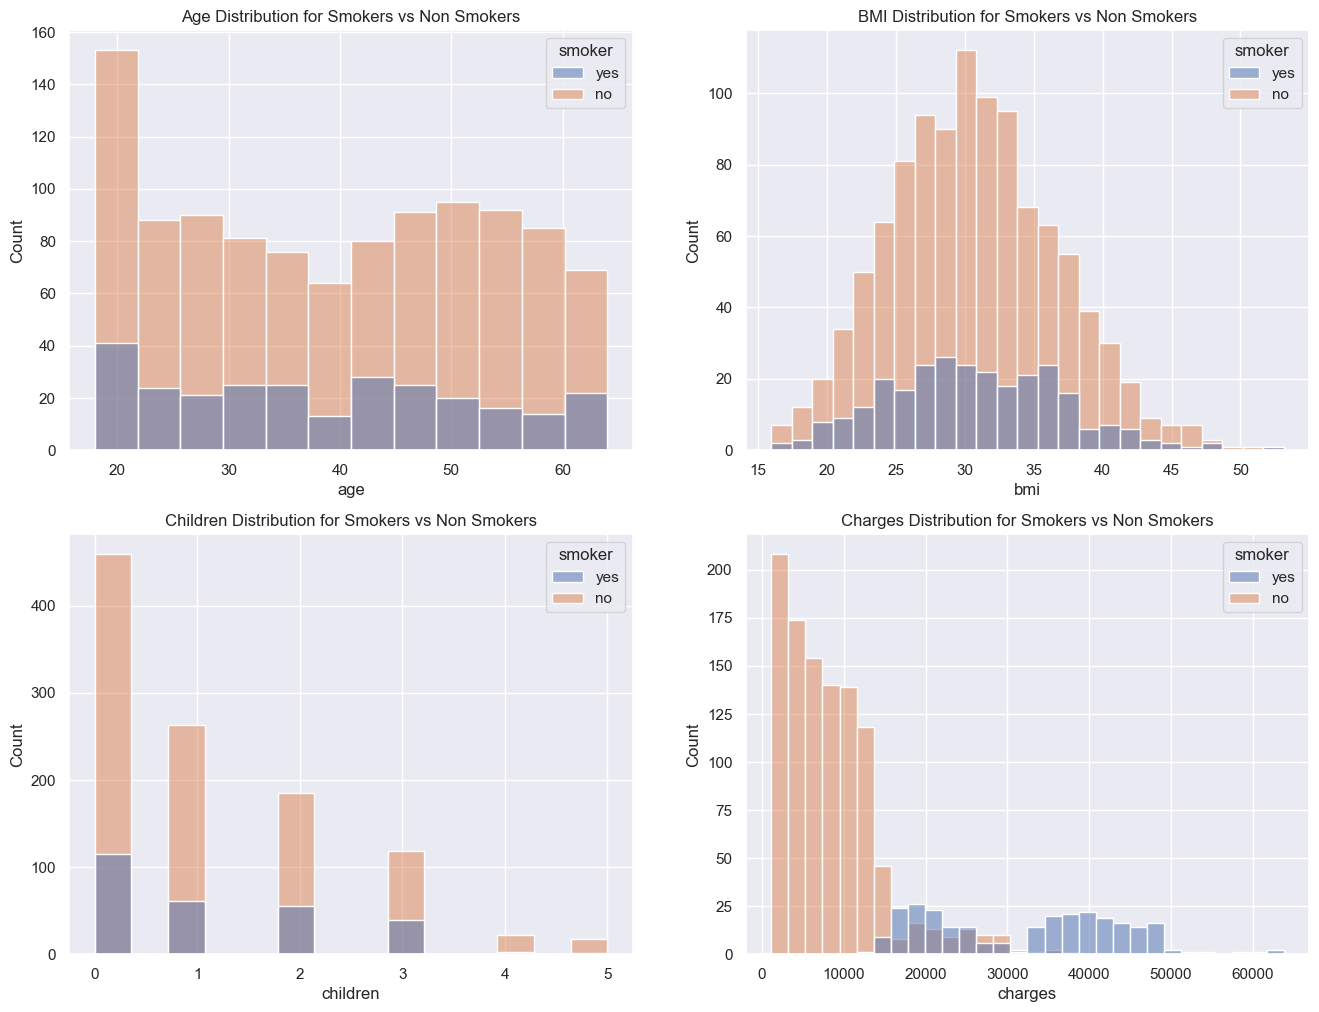

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data=data, x='age', hue='smoker', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution for Smokers vs Non Smokers')
sns.histplot(data=data, x='bmi', hue='smoker', ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution for Smokers vs Non Smokers')
sns.histplot(data=data, x='children', hue='smoker', ax=axes[1, 0])
axes[1, 0].set_title('Children Distribution for Smokers vs Non Smokers')
sns.histplot(data=data, x='charges', hue='smoker', ax=axes[1, 1])
axes[1, 1].set_title('Charges Distribution for Smokers vs Non Smokers')

plt.show()

WHat do you think is the feature that tells us the most about a person being smoker or not?

**Charges feature.**

Now let's see if the gender influences being a smoker or not.
<br>Hint: You can use crosstabbing and then plot distributions

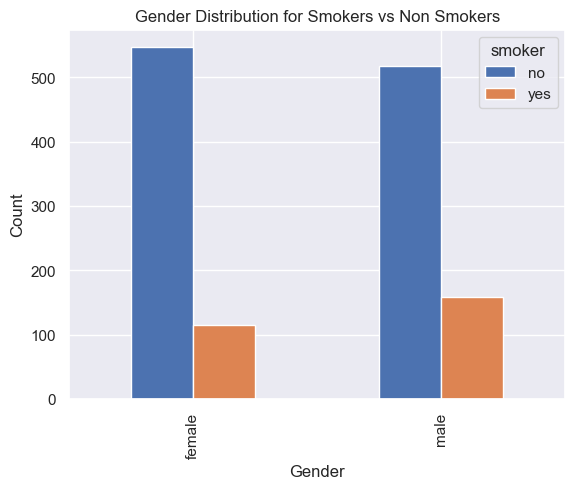

In [150]:
pd.crosstab(data['sex'], data['smoker']).plot(kind='bar')
plt.title('Gender Distribution for Smokers vs Non Smokers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Do you think the gender has an effect on smoking according to your results?

**No.**

Do the same for the column 'region'

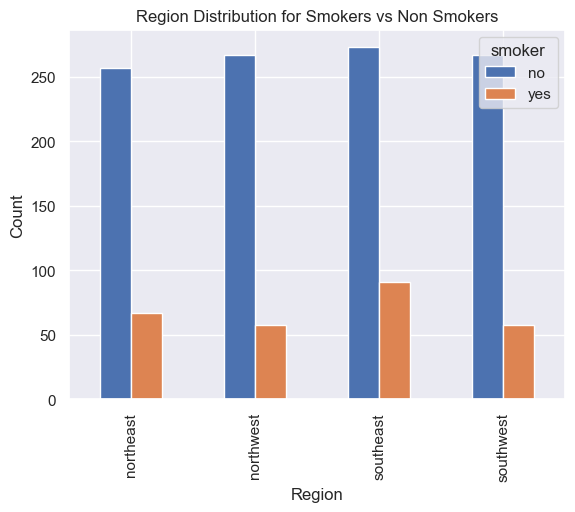

In [151]:
pd.crosstab(data['region'], data['smoker']).plot(kind='bar')
plt.title('Region Distribution for Smokers vs Non Smokers')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by seeing if we have missing data.

In [152]:
data.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

Drop rows with missing values, and make sure you have no nulls anymore.

In [153]:
data = data.dropna()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

See the type of each of your columns

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [155]:
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
data['sex'].value_counts()

0    674
1    661
Name: sex, dtype: int64

And now the smokers column

In [156]:
encoder = LabelEncoder()
data['smoker'] = encoder.fit_transform(data['smoker'])
data['smoker'].value_counts()

0    1061
1     274
Name: smoker, dtype: int64

And now the Region Column

In [157]:
data['region'] = encoder.fit_transform(data['region'])
data['region'].value_counts()

2    364
1    324
0    324
3    323
Name: region, dtype: int64

#### Normalization

Let's scale all the columns by dividing by the maximum

In [158]:
data = data.divide(data.max())
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.504619,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.368180,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.333333,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.666667,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.666667,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%), and fix the random_state parameter to 42 <br>Print the shapes of your training and testing data.

In [159]:
X = data.drop('smoker', axis=1)
y = data['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1068, 6) (1068,)
(267, 6) (267,)


#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

In [160]:
model = LogisticRegression()
model.fit(X_train.values,y_train.values)

LogisticRegression()

#### Evaluation

Evaluate your model on the testing data, and compute: Accuracy, Precision, Recall and F1 score

In [161]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy : {}\nPrecision : {}\nRecall : {}\nF1 score : {}'.format(accuracy, precision, recall, f1))

Accuracy : 0.898876404494382
Precision : 0.9523809523809523
Recall : 0.6153846153846154
F1 score : 0.7476635514018692


C:\Users\Jerichoyasha\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Which metrics you think can be improved?

**We can improve the Accuracy, Recall and F1 score metrics.**

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

Plot a histogram that shows the numbers of smokers and non smokers

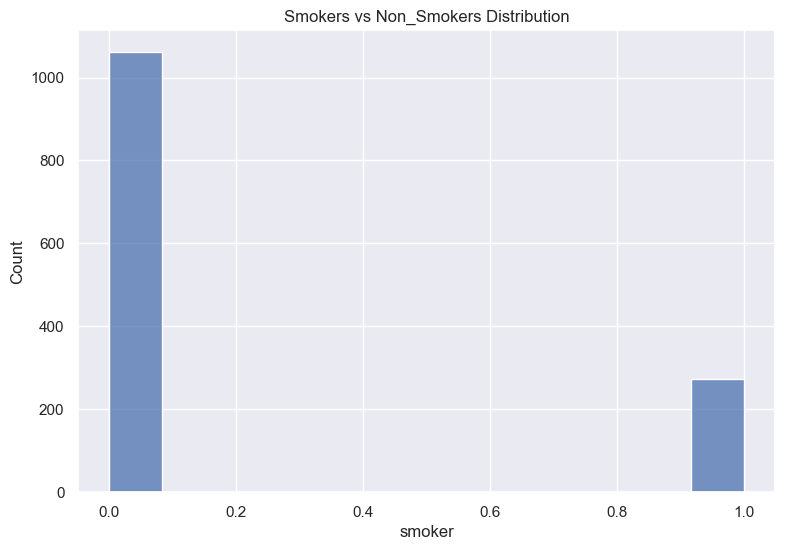

In [162]:
plt.figure(figsize=(9, 6))
sns.histplot(y)
plt.title('Smokers vs Non_Smokers Distribution')
plt.show()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [163]:
over = RandomOverSampler(sampling_strategy=0.5)
X, y = over.fit_resample(X, y)

under = RandomUnderSampler(sampling_strategy=1)
X, y = under.fit_resample(X, y)

Plot a new histogram on the new data we have.

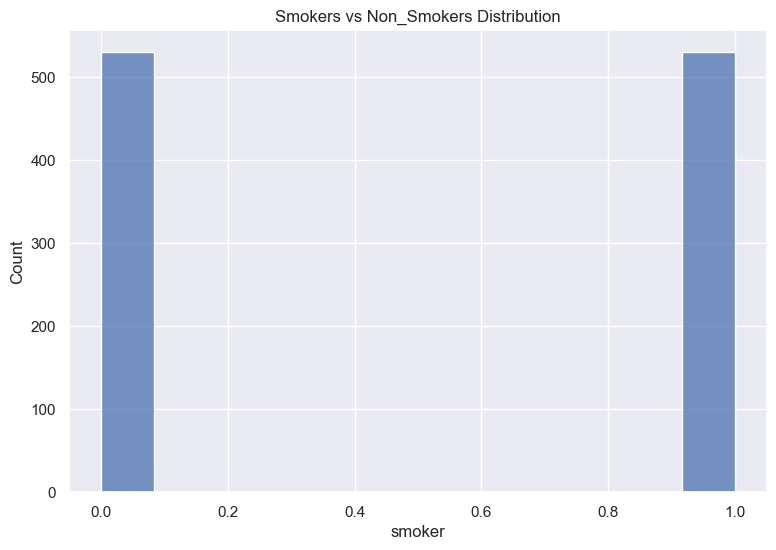

In [164]:
plt.figure(figsize=(9, 6))
sns.histplot(y)
plt.title('Smokers vs Non_Smokers Distribution')
plt.show()

Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(848, 6) (848,)
(212, 6) (212,)


Asses your model on the testing data, and Compute the same metrics you computed before

In [166]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy : {}\nPrecision : {}\nRecall : {}\nF1 score : {}'.format(accuracy, precision, recall, f1))

Accuracy : 0.9575471698113207
Precision : 0.9166666666666666
Recall : 1.0
F1 score : 0.9565217391304348


We can see how much our scores got better when we balanced our dataset.

####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

The possible values of C will be: [0.1, 1, 10, 100, 1000]

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.
We will be doing a 5 folds cross validation

Note: Specify the solver='liblinear' in your LogisticRegression model, and this is because other solvers do not support L1 regularization.

Print the best score and the best parameters

In [167]:
model = LogisticRegression(solver='liblinear')

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print('Best Score : {}'.format(grid_search.best_score_))
print('Best Parameters : {}'.format(grid_search.best_params_))

Best Score : 0.9823250957187609
Best Parameters : {'C': 10, 'penalty': 'l1'}


Let's assess the model's performance in general for the best specified hyperparameters using the same metrics we used earlier.

In [168]:
model = LogisticRegression(solver='liblinear', C=10, penalty='l1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

best_accuracy = accuracy_score(y_test, y_pred)
best_precision = precision_score(y_test, y_pred)
best_recall = recall_score(y_test, y_pred)
best_f1 = f1_score(y_test, y_pred)

print('Accuracy : {}\nPrecision : {}\nRecall : {}\nF1 score : {}'.format(best_accuracy, best_precision, best_recall, best_f1))

Accuracy : 0.9669811320754716
Precision : 0.9339622641509434
Recall : 1.0
F1 score : 0.9658536585365853


We can see that the results improved compared to the last model we built.

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week.
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well it performed on the training data. And after that, different results are aggregated based on weighted averaging.

Create an AdaBoostClassifier Model from sklearn library with n_estimators=10, and fit it on the training data you have.

In [169]:
ada_boost_model = AdaBoostClassifier(n_estimators=10)
ada_boost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10)

Asses the performance of your model on the testing data, and compute the same metrics we computed earlier.

In [170]:
y_pred = ada_boost_model.predict(X_test)

adab_accuracy = accuracy_score(y_test, y_pred)
adab_precision = precision_score(y_test, y_pred)
adab_recall = recall_score(y_test, y_pred)
adab_f1 = f1_score(y_test, y_pred)

print('Accuracy : {}\nPrecision : {}\nRecall : {}\nF1 score : {}'.format(adab_accuracy, adab_precision, adab_recall, adab_f1))

Accuracy : 0.9622641509433962
Precision : 0.9333333333333333
Recall : 0.98989898989899
F1 score : 0.9607843137254903


**BONUS:** One thing you can try on your own, is to tune the Hyperparameters of the Adaboost algorithm, and build an even more powerful model :)

In [173]:
par_grid={'n_estimators':[10, 50, 100, 200, 500],'learning_rate':[0.001, 0.01, 0.1]}

grd_search = GridSearchCV(ada_boost_model, par_grid, cv=5, scoring='accuracy')

grd_search.fit(X_train, y_train)

print('Best Score : {}'.format(grd_search.best_score_))
print('Best Parameters : {}'.format(grd_search.best_params_))

Best Score : 0.9823320570831882
Best Parameters : {'learning_rate': 0.1, 'n_estimators': 500}


In [176]:
ada_boost_model = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
ada_boost_model.fit(X_train, y_train)
y_pred = ada_boost_model.predict(X_test)

best_adab_accuracy = accuracy_score(y_test, y_pred)
best_adab_precision = precision_score(y_test, y_pred)
best_adab_recall = recall_score(y_test, y_pred)
best_adab_f1 = f1_score(y_test, y_pred)

print('Accuracy : {}\nPrecision : {}\nRecall : {}\nF1 score : {}'.format(best_adab_accuracy, best_adab_precision, best_adab_recall, best_adab_f1))

Accuracy : 0.9669811320754716
Precision : 0.9423076923076923
Recall : 0.98989898989899
F1 score : 0.9655172413793104
